# Extraction de Keywords

## Imports

In [15]:
import os
import yake

from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/pav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Préparation

In [5]:
year_selected = 1969

In [6]:
# Lister les fichiers de l'année selectionnée
data_path = "../../data/txt/"

files = [f for f in os.listdir(data_path) if f.endswith('.txt') and f.split('_')[2].split('-')[0] == str(year_selected)]

# Imprimer le nombre de fichiers identifiés
print(len(files))

100


In [7]:
# Quelques stats

count_year = defaultdict(int)
count_month = defaultdict(int)

for f in files:
    elems = f.split("_")
    year = elems[2].split("-")[0]
    month = elems[2].split("-")[1]
    day = elems[2].split("-")[2]
    count_year[year] += 1
    count_month[month] += 1
print(f"Il y a {count_year[str(year_selected)]} fichiers distribués sur {len(count_month)} mois pour l'année choisie")

Il y a 100 fichiers distribués sur 12 mois pour l'année choisie


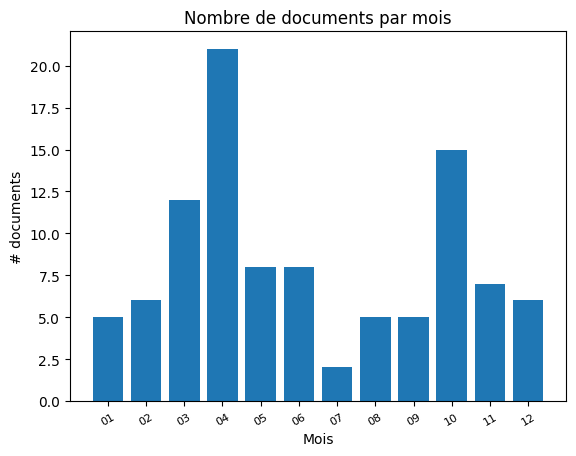

In [10]:
count_month_sorted = dict(sorted(count_month.items(), key=lambda x: int(x[0])))

index = np.arange(len(count_month_sorted))
plt.bar(index, count_month_sorted.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month_sorted.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

## Création d'un fichier contenant le texte de tous les journaux de l'année choisie

In [11]:
contents = []
for f in files:
    with open(os.path.join(data_path, f), 'r', encoding='utf-8') as f:
        lines = f.readlines()
        contents.extend(lines)   # add all lines to contents
        #contents.append(f.read())  

In [13]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year_selected}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(contents))

# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year_selected}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"4 tîîtt : MERCREDI 2 AVRIL 1969 LE SOIR » 21 INTERNATIONAL COMPANY - BRUSSELS 15 has vacàncy for TW0 MALE EMPLOYEES for its commercial services. aged 20 to 35. — Perfect command of ENGLISH and fluency in FRENCH essential; caii 71.01.90 ext. 31 for first contact. 167433 H » *4 ♦♦ ♦♦ 44 44 tt ♦♦ îî *♦ ♦♦ 44 44 4* ' 44 44 44 44 44 44 S.A. ISBECQUE TODD 25-27/ bld. Emile Bockstael, Bruxelles 2 engage , DACTYLOS expérimentées bilingues ayant si possible bonnes notions d'anglais. Semaine de 5 jours. O"

### Nettoyage du fichier

In [16]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [29]:
# Création d'une fonction de nettoyage
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year_selected}.txt"
        output_path = f"{year_selected}_clean.txt"
    else:
        input_path = f"{folder}/{year_selected}.txt"
        output_path = f"{folder}/{year_selected}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            words = nltk.wordpunct_tokenize(line)
            kept = [w.upper() for w in words if len(w) > 1 and w.isalpha() and w.lower() not in sw]
            kept_string = " ".join(kept)
            output.write(kept_string + '\n')
    return f'Output has been written in {output_path}!'

# Nettoyage du fichier
clean_text(year_selected, folder=temp_path)

'Output has been written in ../data/tmp/1969_clean.txt!'

In [30]:
# Vérifier le résultat
integrated_file=f'{year_selected}.txt'
cleaned_file=f'{year_selected}_clean.txt'

with open(os.path.join(temp_path, cleaned_file), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'TÎÎTT MERCREDI AVRIL SOIR INTERNATIONAL COMPANY BRUSSELS HAS VACÀNCY FOR MALE EMPLOYEES FOR ITS COMMERCIAL SERVICES AGED TO PERFECT COMMAND OF ENGLISH AND FLUENCY IN FRENCH ESSENTIAL CAII EXT FOR FIRST CONTACT TT ÎÎ ISBECQUE TODD BLD EMILE BOCKSTAEL BRUXELLES ENGAGE DACTYLOS EXPÉRIMENTÉES BILINGUES SI POSSIBLE BONNES NOTIONS ANGLAIS SEMAINE JOURS OFFRE MANUSCRITE RÉFÉRENCES PRÉTENTIONS COMINIERE RECHERCHE BUREAU ÉTUDEE INGENIEUR TECHNICIEN ELECTRO MECANICIEN AL EXPÉRIMENTÉ CONNAISSANCES EH CONST'

### Analyse de vocabulaire du contenu des articles de l'année choise

In [31]:
# Récupération du contenu des 2 fichiers (avant et après nettoyage)
text = []
text_cleaned = []

with open(os.path.join(temp_path, integrated_file), 'r', encoding='utf-8') as f:
    text = f.read()

with open(os.path.join(temp_path, cleaned_file), 'r', encoding='utf-8') as f:
    text_cleaned = f.read()

In [32]:
# Tokenization in file before cleaning
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found in file before cleaning")

# Tokenization in cleaned file
words_cleaned = nltk.wordpunct_tokenize(text_cleaned)
print(f"{len(words_cleaned)} words found in cleaned file")

799307 words found in file before cleaning
260793 words found in cleaned file


In [33]:
words[:20]

['4',
 'tîîtt',
 ':',
 'MERCREDI',
 '2',
 'AVRIL',
 '1969',
 'LE',
 'SOIR',
 '»',
 '21',
 'INTERNATIONAL',
 'COMPANY',
 '-',
 'BRUSSELS',
 '15',
 'has',
 'vacàncy',
 'for',
 'TW0']

In [34]:
words_cleaned[:20]

['TÎÎTT',
 'MERCREDI',
 'AVRIL',
 'SOIR',
 'INTERNATIONAL',
 'COMPANY',
 'BRUSSELS',
 'HAS',
 'VACÀNCY',
 'FOR',
 'MALE',
 'EMPLOYEES',
 'FOR',
 'ITS',
 'COMMERCIAL',
 'SERVICES',
 'AGED',
 'TO',
 'PERFECT',
 'COMMAND']

## Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [2]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [3]:
# Lister les Fichiers
data_path = "../data/txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [4]:
# Imprimer le nombre de fichiers identifiés
len(files)

0

In [5]:
# Les dix premiers fichiers
files[:10]

[]

In [6]:
# Choisir un fichier
this_file = files[0]
this_file

IndexError: list index out of range

In [ ]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r', encoding='utf-8').read()
text[:500]

'6 AVRIL 1930. VENTES par notaires notaire de AO. 14. avenue pLtronomle, St-Josse (Bruxelles). vente publique dE valeurs de portefeuille * notaire DE RO vendra avec le con U> d ;‘ monsieur Henri SCHILS, agent de t»ar» °o l0 chaussée de Wavre, à Ixelles, au c^sr-S** J* 1 Bourse de Bruxelles (sous-sols, pala’-t °" \' !a ru e Henri Maus), le mercredi tatf*» J* i93°, à 2 h- 1/2 précises : 15 *1 étions de capital de 500 fr. an por- 600 * c , société Belge Chauffe et Comboa- ifur ^pendant de l’actif de '

In [ ]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('maison de rentier', 0.0005827777049895582),
 ('Bruxelles', 0.0008078145443294947),
 ('MAISON', 0.0011227907744149432),
 ('rue', 0.0012288602153612456),
 ('notaire', 0.0013008124744234833),
 ('Belle Maison', 0.0016448914525190803),
 ('Ledit notaire', 0.0016864588153818584),
 ('Maison de Commerce', 0.0022729375981185578),
 ('rue du Nord', 0.002409490908140818),
 ('Etude du notaire', 0.0025820998771179343),
 ('notaires', 0.002648927220644184),
 ('notaire Edmond ECTORS', 0.0030715206759332984),
 ('rentier', 0.0030927312501771434),
 ('Ledit notaire BEECKMAN', 0.0031383123973744743),
 ('BONNE MAISON', 0.0031792675332879424),
 ('Nord', 0.0033637522822457322),
 ('Etude', 0.0036619972849404486),
 ('AVRIL', 0.004371811303798432),
 ('VENTES par notaires', 0.004599292696014343),
 ('VENTES', 0.004844214859684468),
 ('notaire Louis ECTORS', 0.004898739284334454),
 ('Ledit notaire VANISTERBEEK', 0.0052472889307869156),
 ('ledit notaire VAN', 0.005365142369821089),
 ('notaire Louis', 0.005707229263

In [ ]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Belle Maison',
 'Ledit notaire',
 'BONNE MAISON',
 'notaire Louis',
 'Rentier rue',
 'notaire VAN',
 'notaire Edmond',
 'notaire BEECKMAN',
 'BRUXELLES Lot']

## Faire la même opération sur tous les documents

In [ ]:
for f in sorted(files)[80:90]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1888-05-24_01-00002.txt mentions these keywords: faux billets, Mme Théo, Albert Brasseur, Adam Albert, Rowing Club, billet faux, Mme Van, Armand Hexns, rue Belle...
KB_JB838_1888-05-27_01-00004.txt mentions these keywords: Agence Rossel, maison rue, louer belle, belle maison, Diamantt Achat, cours Ayguesparse, louer rue, bonne maison, louer maison, S’ad. rue, avenue Louise, rue Grand, grand jardin, belles maisons...
KB_JB838_1888-06-20_01-00001.txt mentions these keywords: EXEMPLAIRES OBSERVATOIRE, OBSERVATOIRE ROYAL, siècle dernier, TIRAGE QUOTIDIEN, pain fermenté, four banal, fours banals, l’homme préhistorique, c’est rue, JOURNAL QUOTIDIEN, QUOTIDIEN GRATUIT...
KB_JB838_1888-06-21_01-00003.txt mentions these keywords: PLANTES CARNIVORES, observer l'ordonnance, Spectacle varié, Guillaume Tell, JUIN Monnaie, grand concert...
KB_JB838_1888-06-22_01-00002.txt mentions these keywords: Jean Couprie, Jean Jean, ugus allouant, objets exposés, roi Jean, Jean-Louis Jean, dimanche der